In [4]:
import uproot
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [25]:
with uproot.open("/home/fchinu/Run3/pid_studies/datasets/LHC22o_pass7/Train306507/Tree_LHC22o_pass7_K0s_Lambda.root") as f:
    df = []
    for folder in f.keys():
        if "DF" in folder and "O2pidv0s" in folder:
            df.append(f[folder].arrays(library="pd"))
df = pd.concat(df)

In [4]:
df.columns

Index(['fMassK0', 'fMassLambda', 'fMassAntiLambda', 'fPt', 'fPtPos', 'fPtNeg',
       'fTpcInnerParPos', 'fTpcInnerParNeg', 'fRadius', 'fCpa',
       'fDcaV0Daughters', 'fDcaV0ToPv', 'fNSigmaTpcPosPi', 'fNSigmaTpcNegPi',
       'fNSigmaTpcPosPr', 'fNSigmaTpcNegPr', 'fNSigmaTofPosPi',
       'fNSigmaTofNegPi', 'fNSigmaTofPosPr', 'fNSigmaTofNegPr', 'fAlphaArm',
       'fQtArm', 'fOccupancyFt0c', 'fOccupancyIts', 'fCentralityFT0C',
       'fCentralityFT0M', 'fCandFlag'],
      dtype='object')

In [5]:
df = pd.read_parquet("/home/fchinu/Run3/pid_studies/datasets/skimmed/skimmed_LHC22o__k0s.parquet")

(array([[0.00000e+00, 5.10800e+03, 9.50300e+03, ..., 6.00000e+00,
         5.00000e+00, 3.00000e+00],
        [1.00000e+00, 4.26190e+04, 1.02732e+05, ..., 1.10000e+01,
         1.50000e+01, 7.00000e+00],
        [8.00000e+00, 9.91220e+04, 2.57337e+05, ..., 1.50400e+03,
         1.33000e+03, 1.19700e+03],
        ...,
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 4.00000e+00,
         3.00000e+00, 4.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.00000e+00,
         3.00000e+00, 5.00000e+00],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 5.00000e+00,
         3.00000e+00, 4.00000e+00]]),
 array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
         0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
         1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
         1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
         2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        

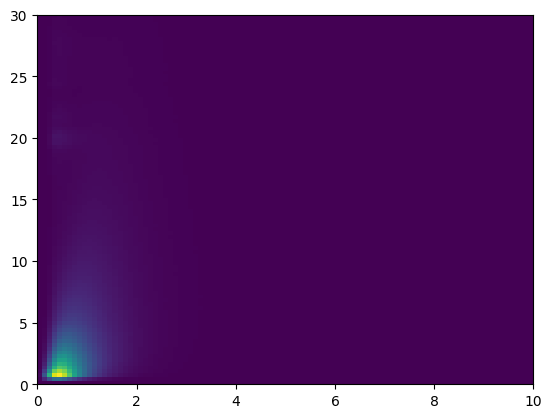

In [30]:
plt.hist2d(df["fPt"], df["fRadius"], bins=(np.linspace(0, 10, 100), np.linspace(0, 30, 100)))

In [38]:
df_radius = df.query("fRadius < 2.3")

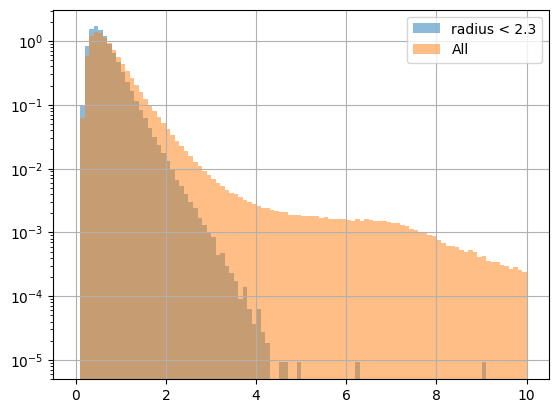

In [44]:
df_radius.fPtPos.hist(bins=100, log=True, density=True, alpha=0.5, label="radius < 2.3", range=(0,10))
df.fPtPos.hist(bins=100, log=True, density=True, alpha=0.5, label="All", range=(0,10))
plt.legend()

## Select k0s

In [37]:
df = df.query("(fMassLambda < 1.11 or fMassLambda > 1.12) and (fMassAntiLambda < 1.11 or fMassAntiLambda > 1.12) and fCpa > 0.9999 and fQtArm > 0.18")

In [64]:
df_k0_pt = df_k0.query("fPt < 3")

<Axes: >

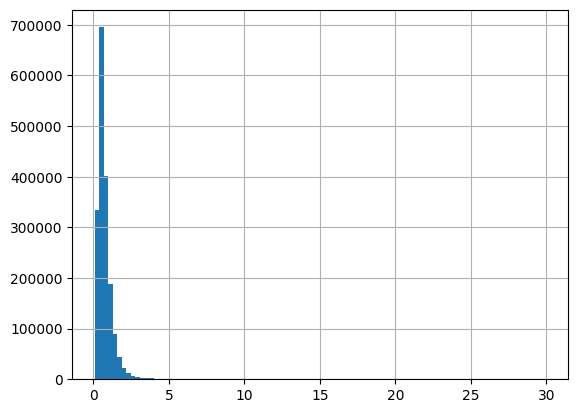

In [71]:
df.query("4000 < fOccupancyFt0c < 6000").fPtPos.hist(bins=100, label="fPtPos")

<Axes: >

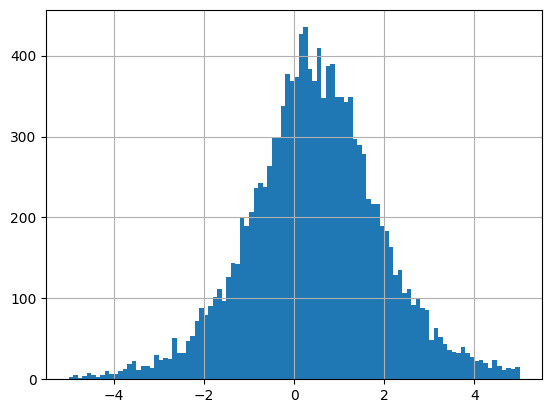

In [6]:
df.query("4000 < fOccupancyFt0c < 6000 and 0.4 < fPtPos < 0.5").fNSigmaTpcPosPi.hist(bins=100, range=(-5, 5))

<Axes: >

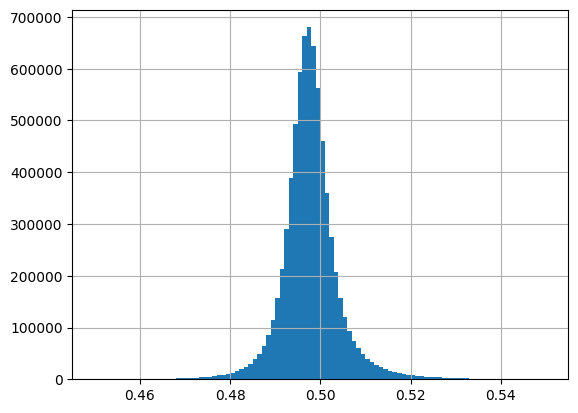

In [40]:
df_k0["fMassK0"].hist(bins=100, range=(0.45, 0.55))

(array([[  0.,   0.,   9., ...,   0.,   0.,   0.],
        [  0.,   0., 199., ...,   0.,   0.,   0.],
        [  0.,   0., 594., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   2.,   5.],
        [  0.,   0.,   0., ...,   2.,   1.,   2.],
        [  0.,   0.,   0., ...,   1.,   2.,   1.]]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9,

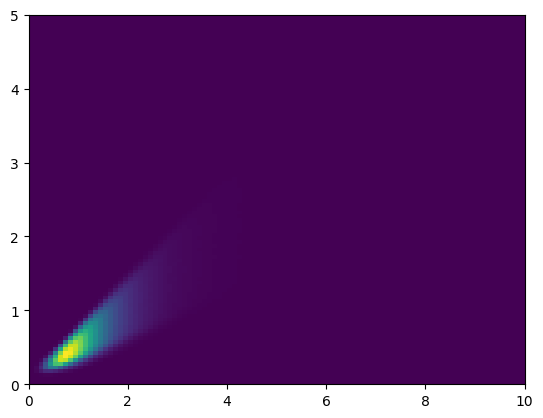

In [41]:
plt.hist2d(df_k0["fPt"], df_k0["fPtPos"], bins=(100, 100), range=((0, 10), (0, 5)))

## Study distributions

In [17]:
pt_bins = np.linspace(0, 3, 31)
radius_bins = np.linspace(0, 3, 24)

In [18]:
average_tof_pos = []
average_tof_neg = []
for pt_min, pt_max in zip(pt_bins[:-1], pt_bins[1:]):
    average_tof_pos.append([])
    average_tof_neg.append([])
    for radius_min, radius_max in zip(radius_bins[:-1], radius_bins[1:]):
        df_k0_pt_pos = df.query(f"{pt_min} < fPt < {pt_max} and {radius_min} < fRadius < {radius_max} and abs(fNSigmaTpcPosPi) < 5")
        if len(df_k0_pt_pos) < 100:
            average_tof_pos[-1].append(np.nan)
        else:
            average_tof_pos[-1].append(df_k0_pt_pos["fNSigmaTpcPosPi"].mean())
        if df_k0_pt_pos["fNSigmaTpcPosPi"].mean() < -1:
            print(f"{pt_min} < fPt < {pt_max} and {radius_min} < fRadius < {radius_max} and abs(fNSigmaTpcPosPi) < 5")

        df_k0_pt_neg = df.query(f"{pt_min} < fPt < {pt_max} and {radius_min} < fRadius < {radius_max} and abs(fNSigmaTpcNegPi) < 5")
        if len(df_k0_pt_neg) < 100:
            average_tof_neg[-1].append(np.nan)
        else:
            average_tof_neg[-1].append(df_k0_pt_neg["fNSigmaTpcNegPi"].mean())

0.30000000000000004 < fPt < 0.4 and 1.434782608695652 < fRadius < 1.5652173913043477 and abs(fNSigmaTpcPosPi) < 5
0.30000000000000004 < fPt < 0.4 and 1.6956521739130435 < fRadius < 1.826086956521739 and abs(fNSigmaTpcPosPi) < 5
2.4000000000000004 < fPt < 2.5 and 0.5217391304347826 < fRadius < 0.6521739130434783 and abs(fNSigmaTpcPosPi) < 5
2.5 < fPt < 2.6 and 0.5217391304347826 < fRadius < 0.6521739130434783 and abs(fNSigmaTpcPosPi) < 5


Text(0.5, 1.0, 'Average fNSigmaTofPosPi vs $p_T$ and Radius')

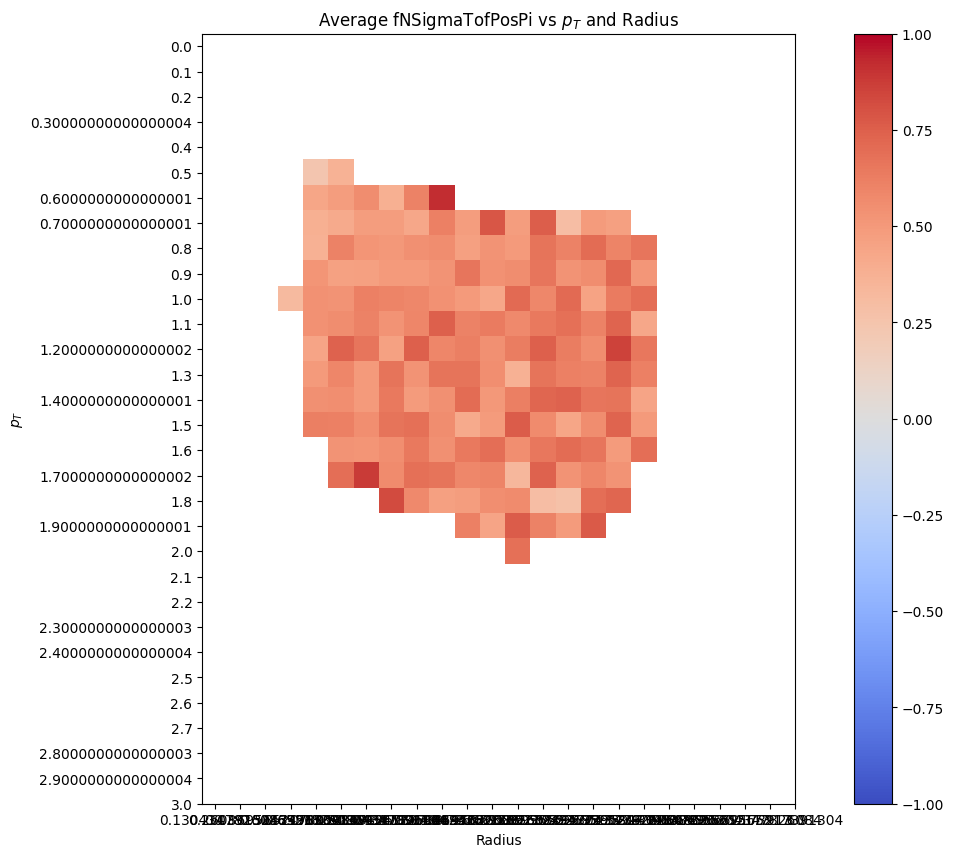

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.imshow(average_tof_pos, cmap="coolwarm", vmin=-1, vmax=1)
# draw color bar
cbar = ax.figure.colorbar(im, ax=ax, cmap="coolwarm")
ax.set_xticks(np.arange(len(radius_bins)), radius_bins)
ax.set_yticks(np.arange(len(pt_bins)), pt_bins)
plt.xlabel("Radius")
plt.ylabel(r"$p_T$")
plt.title(r"Average fNSigmaTofPosPi vs $p_T$ and Radius")

Text(0.5, 1.0, 'Average fNSigmaTofNegPi vs $p_T$ and Radius')

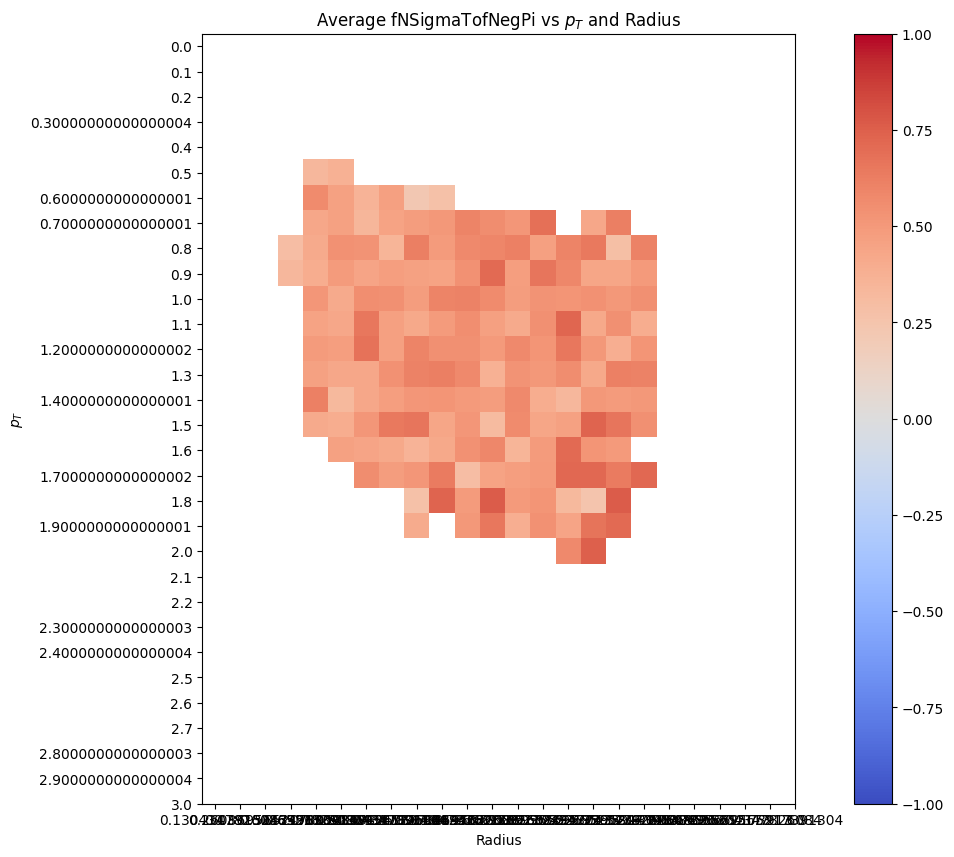

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
im = ax.imshow(average_tof_neg, cmap="coolwarm", vmin=-1, vmax=1)
# draw color bar
cbar = ax.figure.colorbar(im, ax=ax, cmap="coolwarm")
ax.set_xticks(np.arange(len(radius_bins)), radius_bins)
ax.set_yticks(np.arange(len(pt_bins)), pt_bins)
plt.xlabel("Radius")
plt.ylabel(r"$p_T$")
plt.title(r"Average fNSigmaTofNegPi vs $p_T$ and Radius")